<a href="https://colab.research.google.com/github/abdulrehman1215/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download your kaggle API and then upload it into files of Google colab.
If you plan to use your own data or if you plan to do this on jupyter notebook then you can skip first three cells. 

In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 252MB/s]
100% 1.06G/1.06G [00:05<00:00, 198MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

# Importing the required dependencies

In [4]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

# Loading the data for CNN through keras generator

In [5]:
#generators
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
val_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# As all images are not of same dimensions, and our CNN model expects them to be in the same dimensions, so I am normalizing the data.

In [6]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

  train_data = train_data.map(process)
  val_data = val_data.map(process)

# Creating CNN model using keras.

In [7]:
# Creating CNN Model

model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),
           
    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation = 'sigmoid')
])

# Visualizing our model.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

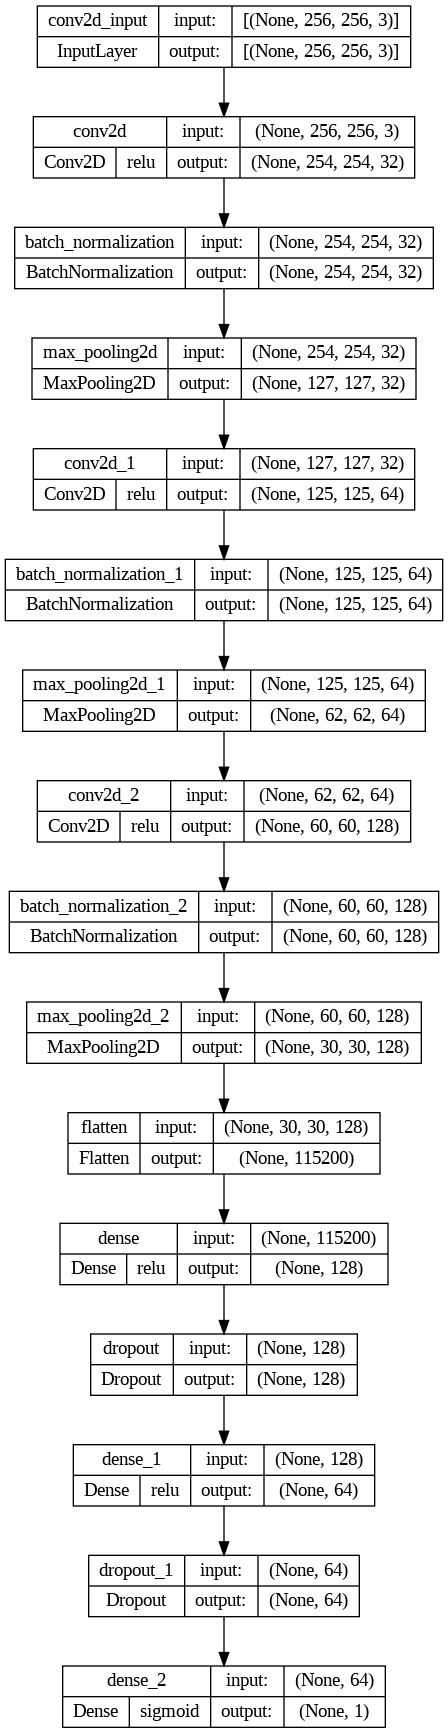

In [14]:
keras.utils.plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes = True, expand_nested=True)

# Compiling and Training the model

In [15]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_data, epochs = 10, validation_data = val_data)

Epoch 1/10
625/625 [==============================] - 87s 115ms/step - loss: 1.2717 - accuracy: 0.5839 - val_loss: 0.6546 - val_accuracy: 0.5810
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6111 - accuracy: 0.6737 - val_loss: 0.6206 - val_accuracy: 0.6446
Epoch 3/10
625/625 [==============================] - 85s 134ms/step - loss: 0.5662 - accuracy: 0.7097 - val_loss: 0.5455 - val_accuracy: 0.7424
Epoch 4/10
625/625 [==============================] - 84s 134ms/step - loss: 0.5343 - accuracy: 0.7369 - val_loss: 0.8717 - val_accuracy: 0.5882
Epoch 5/10
625/625 [==============================] - 79s 126ms/step - loss: 0.4776 - accuracy: 0.7672 - val_loss: 0.5380 - val_accuracy: 0.7684
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4132 - accuracy: 0.7969 - val_loss: 0.5302 - val_accuracy: 0.7202
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3594 - accuracy: 0.8196 - val_loss: 0.4350 - val_ac

# Plotting Train Accuracy and Validation accuracy for checking weather mode is overfitting or underfitting or if it is a right fit.

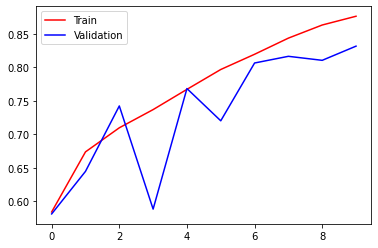

In [17]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.legend()
plt.show()

# Visualizing fit by the loss.

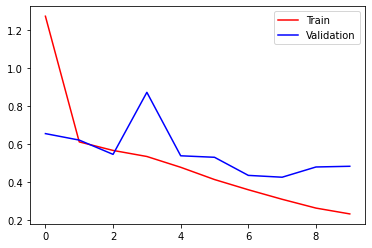

In [18]:
#Loss
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.legend()
plt.show()

# Model is overfitting a bit so we can put in some good practices for tackling overfitting of this model.

## One technique is to give more data to our model. But at the problem at hand it isn't feasible. To get more data we can use a technique called Data Augmentation.